In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
                                                                                                                            
raw = pd.read_csv('kc_house_data.csv')

# Multivariate linear regression

In [8]:
from sklearn import linear_model
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

In [5]:
data = {
    feature: raw[feature].values for feature in raw.columns[4:]
}

X = pd.DataFrame(
    data=data,
    index=raw['id'].values, 
)
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(train_score, test_score)

0.7030633586310241 0.6774313645020911


### Normalisation of variables

### Regularisation parameter lambda

# Feature selection

### L1-based feature selection

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

### Tree-based feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

### Univariate feature selection

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

ValueError: Input X must be non-negative.

### Removing features with low variance

In [61]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)
selected_features_indices = selector.get_support(indices=True)
selected_features_labes = [X.columns[i] for i in selected_features_indices]
X_new = pd.DataFrame(
    data=X_new,
    columns=selected_features_labes,
)

for feature in X.columns.values:
    if feature not in X_new.columns.values:
        print('Not selected feature :'+feature)

Not selected feature :waterfront
Not selected feature :lat
Not selected feature :long


In [65]:
y = raw.price.values
x = X_new
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(train_score, test_score)

0.6340607464129631 0.6241685888612626


# Ridge regression model

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

In [9]:
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

for alpha in np.arange(0, 1, 0.1):
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X_train, y_train)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Alpha : {}\tTrain score : {}\tTest score : {}'
          .format(round(alpha,2), round(train_score,5), round(test_score,5)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.200593e-20
  overwrite_a=True).T


Alpha : 0.0	Train score : 0.70306	Test score : 0.67743
Alpha : 0.1	Train score : 0.70306	Test score : 0.67744
Alpha : 0.2	Train score : 0.70306	Test score : 0.67744
Alpha : 0.3	Train score : 0.70306	Test score : 0.67745
Alpha : 0.4	Train score : 0.70306	Test score : 0.67745
Alpha : 0.5	Train score : 0.70306	Test score : 0.67746
Alpha : 0.6	Train score : 0.70306	Test score : 0.67746
Alpha : 0.7	Train score : 0.70306	Test score : 0.67747
Alpha : 0.8	Train score : 0.70306	Test score : 0.67747
Alpha : 0.9	Train score : 0.70306	Test score : 0.67748


### Cross-Validation

In [82]:
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Alpha : {}\tTrain score : {}\tTest score : {}'
      .format(round(reg.alpha_,2), round(train_score,5), round(test_score,5)))

Alpha : 1.0	Train score : 0.70306	Test score : 0.67748


In [7]:
reg

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=3, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

### Definition of parameter alpha

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.788148e-20
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.662045e-20
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.580077e-20
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.122321e-20
  overwrite_a=True).T
/usr/local/lib/python3.6

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.372006e-20
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.074405e-21
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.455235e-20
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.906687e-21
  overwrite_a=True).T
/usr/local/lib/python3.6

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.597983e-19
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.801892e-19
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.051577e-19
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.347038e-19
  overwrite_a=True).T
/usr/local/lib/python3.6

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.297493e-18
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.725702e-18
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.215501e-18
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.684908e-18
  overwrite_a=True).T
/usr/local/lib/python3.6

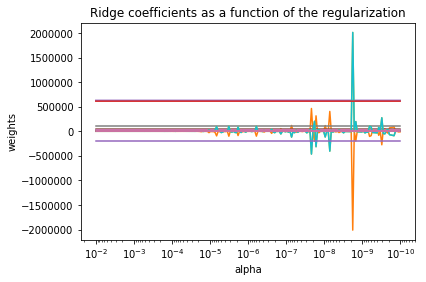

In [41]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xgblim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Lasso regression model
The Lasso is a linear model that estimates sparse coefficients. 
It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

In [78]:
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

reg = linear_model.Lasso(alpha=0.5)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.70306	Test score : 0.67743


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Elastic Net
ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

reg = linear_model.ElasticNet(random_state=0)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.61546	Test score : 0.60923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Elastic net with cross validation

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)

reg = linear_model.ElasticNetCV(cv=5, random_state=0)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.39304	Test score : 0.39804


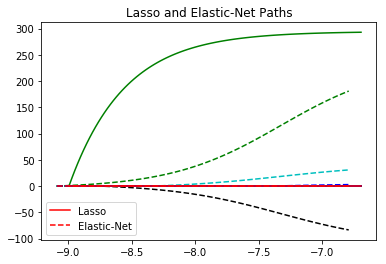

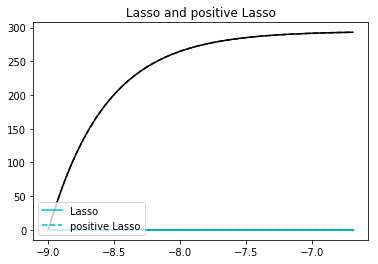

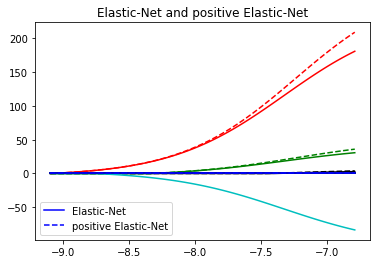

In [140]:
from itertools import cycle

from sklearn.linear_model import lasso_path, enet_path

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X, y, eps, positive=True, fit_intercept=False)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
alphas_positive_enet, coefs_positive_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')

plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),loc='lower left')
plt.show()

# Least Angle Regression or LARS


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)

reg = linear_model.Lars()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.6952	Test score : 0.68916


### LARS Lasso

In [110]:
reg = linear_model.LassoLars(alpha=10)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.69492	Test score : 0.68929


.

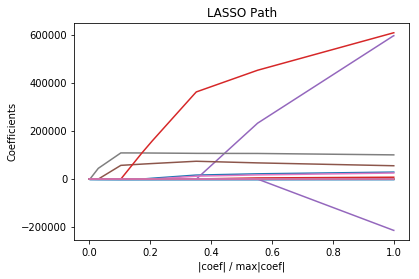

In [132]:
_, _, coefs = linear_model.lars_path(x.values, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Orthogonal Matching Pursuit (OMP)

In [154]:
n_nonzero_coefs = 17

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)
omp = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp_cv = linear_model.OrthogonalMatchingPursuitCV(cv=5)
omp.fit(X_train, y_train)
omp_cv.fit(X_train, y_train)

reg = omp
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

reg=omp_cv
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}......cross validation'
      .format(round(train_score,5), round(test_score,5)))


Train score : 0.70306	Test score : 0.67743
Train score : 0.66142	Test score : 0.63716......cross validation


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


# Bayesian Ridge Regression

In [155]:
reg = linear_model.BayesianRidge(compute_score=True)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.70306	Test score : 0.6774


# Automatic Relevance Determination Regression (ARD)

In [157]:
reg = linear_model.ARDRegression(compute_score=True)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

MemoryError: 

# Polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

### Polynomial regression linearReg

In [80]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])

reg = model.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.82588	Test score : 0.81804


In [54]:
for degree in [1, 2, 3]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    reg = model.fit(X_train, y_train)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Train score : {}\tTest score : {}.... degree = {}'
          .format(round(train_score,5), round(test_score,5), degree))

Train score : 0.70306	Test score : 0.67743.... degree = 1
Train score : 0.82644	Test score : 0.81801.... degree = 2
Train score : 0.87011	Test score : 0.69917.... degree = 3


### Polynomial regression Ridge

In [27]:
for degree in [1, 2, 3]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.Ridge())
    reg = model.fit(X_train, y_train)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Train score : {}\tTest score : {}.... degree = {}'
          .format(round(train_score,5), round(test_score,5), degree))

Train score : 0.70306	Test score : 0.67748.... degree = 1
Train score : 0.8238	Test score : 0.81685.... degree = 2
Train score : 0.8535	Test score : 0.67221.... degree = 3


In [34]:
for degree in [1, 2]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.Lasso(alpha=0.5))
    reg = model.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Train score : {}\tTest score : {}.... degree = {}'
          .format(round(train_score,5), round(test_score,5), degree))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score : 0.70306	Test score : 0.67743.... degree = 1
Train score : 0.78094	Test score : 0.77615.... degree = 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
